In [1]:
##import libraries 

#dataprep
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np 

##keras stuff 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

#saving prediction output 
import pickle

#graphing
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
image_df = pd.read_csv('./data_multi_label/full_image_df.csv')
image_df = image_df.drop(columns='Unnamed: 0')
image_df.image_saved_as = image_df.image_saved_as.apply(lambda x: x +'.png')

print (image_df.shape)

image_df.head()

(2313, 17)


,AKA,AKE,AKH,AKY,ALC,AMN,BNZ,COC,COH,COO,COONH2,KEY,OH,SHH,cid,image_saved_as,ring
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13156,3_bromo_2_butanone_13156.png,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62791,3_bromo_2_butanone_62791.png,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13142,3_bromo_2_butanone_13142.png,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12413224,3_bromo_2_butanone_12413224.png,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,123858546,3_bromo_2_butanone_123858546.png,0.0


In [3]:
train = image_df.sample(frac = 0.80, random_state=1) # sampling with out replacement is the default

print (train.shape)

train.head()

(1850, 17)


,AKA,AKE,AKH,AKY,ALC,AMN,BNZ,COC,COH,COO,COONH2,KEY,OH,SHH,cid,image_saved_as,ring
959,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59922317,2_aminopropane_59922317.png,0.0
47,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3822501,4_picolylamine_3822501.png,1.0
1123,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15114725,3_trimethylsilyl_ethynylbenzaldehyde_15114725.png,1.0
553,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,57616908,lysine_57616908.png,0.0
996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87701396,2_aminopropane_87701396.png,0.0


In [4]:
#Set a mask equal to the cid's which are in the training set that we made using pandas.sample 
mask = train['cid']

#for loop did not like the pandas.series, so I converted to a list 
mask = list(mask)


#this for loop checks the full dataframe (image_df) cid's against the ones in train
index_to_drop = []
for index, entry in enumerate(image_df['cid']):
#     print (entry)
    if entry in mask:
        index_to_drop.append(index)


# build the test dataframe by dropping the indicies which are not overlapping 
test = image_df.drop(labels=index_to_drop, axis=0)

print (test.shape)
print ('--'*25)
print (train.shape)
print ('--'*25)
print (image_df.shape)

# test.head()

(463, 17)
--------------------------------------------------
(1850, 17)
--------------------------------------------------
(2313, 17)


In [5]:
# We are going to look at a subset of features first 
features = ['AKA', 'AKE', 'ring', 'BNZ', 'image_saved_as']

#apply those feature constraints to the dataframes 
train_features = train[features]
test_features = test[features]

train_features.head()

,AKA,AKE,ring,BNZ,image_saved_as
959,1.0,0.0,0.0,0.0,2_aminopropane_59922317.png
47,1.0,0.0,1.0,1.0,4_picolylamine_3822501.png
1123,1.0,0.0,1.0,1.0,3_trimethylsilyl_ethynylbenzaldehyde_15114725.png
553,1.0,0.0,0.0,0.0,lysine_57616908.png
996,1.0,0.0,0.0,0.0,2_aminopropane_87701396.png


In [6]:
#Conver the float into into ints
train_features[["AKA", "AKE", "ring", "BNZ"]] = train_features[["AKA", "AKE", "ring", "BNZ"]].astype(int)
test_features[["AKA", "AKE", "ring", "BNZ"]] = test_features[["AKA", "AKE", "ring", "BNZ"]].astype(int)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [7]:
train_features ['AKA']=train_features.AKA.replace(to_replace=1.0, value = 'AKA')
train_features ['AKE']=train_features.AKE.replace(to_replace=1.0, value = 'AKE')
train_features ['ring']=train_features.ring.replace(to_replace=1.0, value = 'ring')
train_features ['BNZ']=train_features.BNZ.replace(to_replace=1.0, value = 'BNZ')

test_features ['AKA']=test_features.AKA.replace(to_replace=1.0, value = 'AKA')
test_features ['AKE']=test_features.AKE.replace(to_replace=1.0, value = 'AKE')
test_features ['ring']=test_features.ring.replace(to_replace=1.0, value = 'ring')
test_features ['BNZ']=test_features.BNZ.replace(to_replace=1.0, value = 'BNZ')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [8]:
# using assign to make a label column, this is a req for the imagedatagen class, this is not unlike the way data must
# formatted when getting data ready for scala 

train_features = train_features.assign(label = list(train_features['AKA'].astype(str) +',' + train_features['AKE'].astype('str') + ','
                                  + train_features['ring'].astype(str) + ',' + train_features['BNZ'].astype('str')))



In [9]:
test_features = test_features.assign(label = list(test_features['AKA'].astype(str) +',' + test_features['AKE'].astype('str') + ','
                                  + test_features['ring'].astype(str) + ',' + test_features['BNZ'].astype('str')))


In [10]:
test_features.head()

,AKA,AKE,ring,BNZ,image_saved_as,label
4,AKA,0,0,0,3_bromo_2_butanone_123858546.png,"AKA,0,0,0"
7,AKA,0,0,0,3_bromo_2_butanone_14692245.png,"AKA,0,0,0"
15,AKA,0,ring,BNZ,4_picolylamine_12238842.png,"AKA,0,ring,BNZ"
20,AKA,0,ring,BNZ,4_picolylamine_12425236.png,"AKA,0,ring,BNZ"
25,AKA,0,ring,BNZ,4_picolylamine_87523068.png,"AKA,0,ring,BNZ"


In [11]:
stopwords = '0'
# words = train_features['label'][0].split(',')     
# new_entry = [word for word in words if word not in stopwords]

df_entry = []

for i in train_features['label']:
    words = i.split(',')
    new_entry = [word for word in words if word not in stopwords]
    df_entry.append(new_entry)


# print (df_entry)
train_features["label"] = df_entry


## https://stackoverflow.com/questions/29771168/how-to-remove-words-from-a-list-in-python

In [12]:
train_features.head()

,AKA,AKE,ring,BNZ,image_saved_as,label
959,AKA,0,0,0,2_aminopropane_59922317.png,[AKA]
47,AKA,0,ring,BNZ,4_picolylamine_3822501.png,"[AKA, ring, BNZ]"
1123,AKA,0,ring,BNZ,3_trimethylsilyl_ethynylbenzaldehyde_15114725.png,"[AKA, ring, BNZ]"
553,AKA,0,0,0,lysine_57616908.png,[AKA]
996,AKA,0,0,0,2_aminopropane_87701396.png,[AKA]


In [13]:
stopwords = '0'
# words = train_features['label'][0].split(',')     
# new_entry = [word for word in words if word not in stopwords]

df_entry = []

for i in test_features['label']:
    words = i.split(',')
    new_entry = [word for word in words if word not in stopwords]
    df_entry.append(new_entry)


# print (df_entry)
test_features["label"] = df_entry


## https://stackoverflow.com/questions/29771168/how-to-remove-words-from-a-list-in-python

In [14]:
test_features.head()

,AKA,AKE,ring,BNZ,image_saved_as,label
4,AKA,0,0,0,3_bromo_2_butanone_123858546.png,[AKA]
7,AKA,0,0,0,3_bromo_2_butanone_14692245.png,[AKA]
15,AKA,0,ring,BNZ,4_picolylamine_12238842.png,"[AKA, ring, BNZ]"
20,AKA,0,ring,BNZ,4_picolylamine_12425236.png,"[AKA, ring, BNZ]"
25,AKA,0,ring,BNZ,4_picolylamine_87523068.png,"[AKA, ring, BNZ]"


In [15]:
### Data is properly formatted, now we can begin with the imagedatagen class 

#Instantiate the ImageDataGenerator 

datagen = ImageDataGenerator(rotation_range=30,rescale=1./255, validation_split=0.25) # shear_range=0.2

In [16]:
# We are fitting this class

batch = 8 #updating the size

training_generator = datagen.flow_from_dataframe(
    train_features, 
    directory = './images_multi_label/',
    x_col = 'image_saved_as',
    y_col = 'label',
    subset='training',
    target_size = (300,300),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    batch_size = batch,
#     drop_duplicates = False,
    save_to_dir = '/Users/patrickcavins/Desktop/augment/',
    save_format = '.png'
)

Found 1388 images belonging to 4 classes.


In [17]:
validation_generator = datagen.flow_from_dataframe(
    train_features, 
    directory = './images_multi_label/',
    x_col = 'image_saved_as',
    y_col = 'label',
    subset='validation',
    target_size = (300,300),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    batch_size = batch,
#     drop_duplicates = False,
    save_to_dir = '/Users/patrickcavins/Desktop/augment/',
    save_format = '.png'
)

Found 462 images belonging to 4 classes.


In [18]:
test_datagen = ImageDataGenerator(rescale=1./255.)


test_generator=test_datagen.flow_from_dataframe(
dataframe= test_features,
directory="./images_multi_label/",
x_col="image_saved_as",
y_col='label',
batch_size=batch,
# seed=42,
shuffle=False,
class_mode='categorical',
color_mode = 'grayscale',
target_size=(300,300))

Found 463 images belonging to 4 classes.


In [19]:
model = Sequential()

#add more layers/filter because of image

model.add(Conv2D(128, (5, 5), input_shape=(300, 300, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
          
model.add(Conv2D(64, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
          

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.50)) # 50% 
model.add(Dense(4)) # can convert back to 4 
model.add(Activation('sigmoid'))

model.summary()

          

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 296, 296, 128)     3328      
_________________________________________________________________
activation_1 (Activation)    (None, 296, 296, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 98, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 64)        204864    
_________________________________________________________________
activation_2 (Activat

In [20]:
# model.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])

##
from keras import optimizers

ad_delta = optimizers.Adadelta(lr = 0.01, rho = 0.5, decay = 0.001)

# adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.00001, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer= ad_delta, metrics=['accuracy'])

In [21]:
history = model.fit_generator(generator = training_generator, 
                              steps_per_epoch= 10, 
                              epochs=10, validation_data= validation_generator, 
                                  validation_steps = 10
                                )

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
10/10 [==============================] - 25s 3s/step - loss: 0.6506 - acc: 0.6281 - val_loss: 0.6587 - val_acc: 0.6531
Epoch 2/10
10/10 [==============================] - 25s 3s/step - loss: 0.6312 - acc: 0.6250 - val_loss: 0.6450 - val_acc: 0.6594
Epoch 3/10
10/10 [==============================] - 25s 3s/step - loss: 0.5879 - acc: 0.7031 - val_loss: 0.6334 - val_acc: 0.6687
Epoch 4/10
10/10 [==============================] - 26s 3s/step - loss: 0.5644 - acc: 0.6937 - val_loss: 0.6277 - val_acc: 0.6531
Epoch 5/10
10/10 [==============================] - 31s 3s/step - loss: 0.6223 - acc: 0.6750 - val_loss: 0.6416 - val_acc: 0.6375
Epoch 6/10
10/10 [==============================] - 33s 3s/step - loss: 0.5655 - acc: 0.7156 - val_loss: 0.6155 - val_acc: 0.6795
Epoch 7/10
10/10 [==============================] - 31s 3s/step - loss: 0.5836 - acc: 0.6750 - val_loss: 0.6119 - val_acc: 0.6969
Epoch 8/10
10/10 [========================

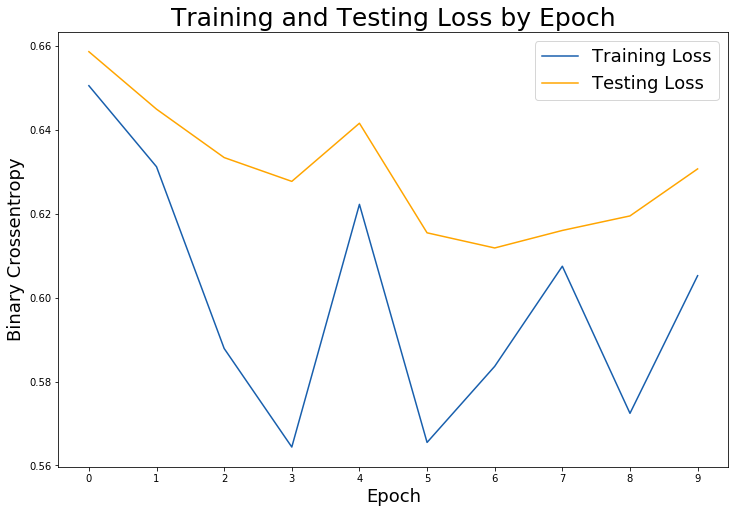

In [22]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Binary Crossentropy', fontsize = 18)
plt.xticks(range(10))

plt.legend(fontsize = 18);

In [23]:
#Testing 
metric = model.evaluate_generator(validation_generator, steps=10, verbose=1)



labels = model.metrics_names


# Show model performance.
print(f'{labels[0]}: {metric[0]}')
print(f'{labels[1]}: {metric[1]}')

10/10 [==============================] - 9s 916ms/step
loss: 0.6224780632899358
acc: 0.6698717948717948


In [24]:
test_generator.reset()

pred=model.predict_generator(test_generator,
steps=10,
verbose=1)

10/10 [==============================] - 7s 722ms/step


In [25]:
training_generator.class_indices

{'AKA': 0, 'AKE': 1, 'BNZ': 2, 'ring': 3}

In [26]:
pred_class = (pred >= .5).astype(int)

In [27]:
pred_class

array([[1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0,

In [28]:
pred

array([[0.51636237, 0.3134672 , 0.52228445, 0.5983108 ],
       [0.5159164 , 0.3137474 , 0.52248925, 0.59832096],
       [0.51613456, 0.3124041 , 0.5211929 , 0.59556985],
       [0.51575744, 0.31125405, 0.52108794, 0.5994312 ],
       [0.5170506 , 0.3099975 , 0.5213163 , 0.6004798 ],
       [0.5188749 , 0.31093532, 0.52127635, 0.5982815 ],
       [0.51764214, 0.3109382 , 0.52610505, 0.60397106],
       [0.5174139 , 0.3111502 , 0.5255054 , 0.59921956],
       [0.5164513 , 0.30861884, 0.5222391 , 0.6009675 ],
       [0.51641417, 0.31125706, 0.5214402 , 0.6000917 ],
       [0.5174049 , 0.31147948, 0.5224987 , 0.6007017 ],
       [0.51388127, 0.3102637 , 0.52223545, 0.6016395 ],
       [0.51508546, 0.31108582, 0.5227591 , 0.6018179 ],
       [0.51745   , 0.3142064 , 0.5228179 , 0.59759915],
       [0.5179961 , 0.31352603, 0.5233529 , 0.59914774],
       [0.5178282 , 0.31402797, 0.5216041 , 0.5970065 ],
       [0.5180838 , 0.31374088, 0.5242661 , 0.59870946],
       [0.5176857 , 0.31487006,

In [29]:
training_generator.class_indices

{'AKA': 0, 'AKE': 1, 'BNZ': 2, 'ring': 3}

In [32]:
# https://stackoverflow.com/questions/50988050/cnn-training-accuracy-is-1-0-and-validation-accuracy-is-1-0-prediction-return


import numpy as np
from keras.preprocessing import image


test_image = image.load_img('/Users/patrickcavins/Downloads/bnz.png', grayscale = True, target_size = (300, 300,1))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
# training_generator.class_indices
# if result[0][0] == 1:
#     prediction = 'Yes'
# else:
#     prediction = 'No'

result

/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


array([[0.9999999, 0.       , 1.       , 1.       ]], dtype=float32)

In [33]:
pred_val=model.predict_generator(validation_generator,
steps=10,
verbose=1)

10/10 [==============================] - 5s 496ms/step


In [34]:
pred_val

array([[0.5161947 , 0.31608373, 0.5230555 , 0.59941363],
       [0.51694846, 0.31329504, 0.5218082 , 0.5986253 ],
       [0.5163728 , 0.31474978, 0.5231359 , 0.5976504 ],
       [0.5158432 , 0.3137986 , 0.5208209 , 0.6001371 ],
       [0.5181535 , 0.31335348, 0.52191496, 0.5988364 ],
       [0.51680106, 0.31270927, 0.5211709 , 0.59985346],
       [0.5179636 , 0.31155536, 0.5226572 , 0.59842616],
       [0.51748866, 0.3129959 , 0.52221876, 0.5977388 ],
       [0.5148302 , 0.31575322, 0.5214443 , 0.59902906],
       [0.51674694, 0.31415272, 0.5210082 , 0.60094166],
       [0.514578  , 0.31021816, 0.52134585, 0.6010319 ],
       [0.51828694, 0.3111989 , 0.52220994, 0.59842634],
       [0.5177855 , 0.3108829 , 0.52275467, 0.60273546],
       [0.5151722 , 0.31239527, 0.5222974 , 0.6007867 ],
       [0.515711  , 0.31514233, 0.52321756, 0.5983835 ],
       [0.5197865 , 0.3109562 , 0.5235655 , 0.6010278 ],
       [0.5175235 , 0.31046158, 0.5214657 , 0.5997727 ],
       [0.5165712 , 0.31355268,

In [35]:
(pred_val >= .5).astype(int)

array([[1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0,